<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [89]:
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab resource

with open("agentic_ai_500k.txt", 'r') as f:
  text = f.read()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [90]:
type(text)

str

In [91]:
from nltk.tokenize import sent_tokenize, word_tokenize
# Split into sentences first
sentences = nltk.sent_tokenize(text)
sentences

['Agentic AI: The Future of Autonomous Intelligence\n\nIntroduction\n-------------\nAgentic AI refers to artificial intelligence systems that act as autonomous agents, capable of perceiving their environment, making decisions, \nand taking actions to achieve specific goals without constant human intervention.',
 'Unlike traditional AI systems that follow predefined scripts, \nagentic AI systems are more dynamic, adaptive, and goal-oriented.',
 'This document provides an extensive exploration of agentic AI, its foundations, \napplications, ethical challenges, and potential future directions.',
 '### Understanding Agentic AI\n\nAgentic AI is inspired by the concept of agency, which in philosophy and cognitive science refers to the capacity of an entity to act in pursuit of goals.',
 'In computer science, an agent is defined as a system situated in an environment, capable of autonomous actions to achieve designated objectives.',
 'Agentic AI, therefore, combines artificial intelligence wi

In [92]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
cleaned_sentences = []

for sentence in sentences:
    # Lowercase
    sentence = sentence.lower()
    # Remove all characters except letters and spaces
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    # Remove extra spaces
    sentence = re.sub(r'\s+', ' ', sentence).strip()
    # Remove stopwords
    words = sentence.split()
    words = [word for word in words if word not in stop_words]
    cleaned_sentence = ' '.join(words)

    # Add sentence only if not empty
    if cleaned_sentence:
        cleaned_sentences.append(cleaned_sentence)

In [93]:
corpus = cleaned_sentences
corpus

['agentic ai future autonomous intelligence introduction agentic ai refers artificial intelligence systems act autonomous agents capable perceiving environment making decisions taking actions achieve specific goals without constant human intervention',
 'unlike traditional ai systems follow predefined scripts agentic ai systems dynamic adaptive goaloriented',
 'document provides extensive exploration agentic ai foundations applications ethical challenges potential future directions',
 'understanding agentic ai agentic ai inspired concept agency philosophy cognitive science refers capacity entity act pursuit goals',
 'computer science agent defined system situated environment capable autonomous actions achieve designated objectives',
 'agentic ai therefore combines artificial intelligence autonomy create systems reason plan learn adapt',
 'unlike narrow ai systems excel specific tasks image classification speech recognition agentic ai emphasizes flexible decisionmaking',
 'instance self

In [94]:
tokenizer = Tokenizer()

In [95]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'ai': 1, 'agents': 2, 'agentic': 3, 'systems': 4, 'learning': 5, 'act': 6, 'environment': 7, 'science': 8, 'objectives': 9, 'autonomy': 10, 'plan': 11, 'learn': 12, 'adapt': 13, 'environments': 14, 'optimal': 15, 'reinforcement': 16, 'operate': 17, 'adaptation': 18, 'autonomous': 19, 'intelligence': 20, 'artificial': 21, 'capable': 22, 'refers': 23, 'actions': 24, 'achieve': 25, 'specific': 26, 'goals': 27, 'without': 28, 'human': 29, 'unlike': 30, 'provides': 31, 'decisionmaking': 32, 'must': 33, 'safety': 34, 'research': 35, 'understanding': 36, 'inspired': 37, 'concept': 38, 'agency': 39, 'philosophy': 40, 'cognitive': 41, 'capacity': 42, 'entity': 43, 'pursuit': 44, 'computer': 45, 'agent': 46, 'defined': 47, 'system': 48, 'situated': 49, 'designated': 50, 'therefore': 51, 'combines': 52, 'create': 53, 'reason': 54, 'narrow': 55, 'excel': 56, 'tasks': 57, 'image': 58, 'classification': 59, 'speech': 60, 'recognition': 61, 'emphasizes': 62, 'flexible': 63, 'instance': 64, 'selfdriv

In [96]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    #break

Streaming output truncated to the last 5000 lines.
[91, 92, 2, 93, 94, 95, 96, 97, 98]
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[109, 110, 3, 1, 111, 112, 5, 16, 5, 113, 4]
[16, 5, 114, 31, 115, 116, 2, 12, 15, 117, 118, 119]
[120, 2, 17, 14, 121, 122, 123]
[124, 125, 3, 1]
[10, 126, 17, 28, 29, 127]
[128, 129, 2, 130, 9, 131, 18]
[132, 133, 2, 134, 135, 7, 6, 136]
[5, 18, 137, 138, 2, 139, 140]
[141, 2, 142, 143, 144, 2]
[36, 3, 1, 3, 1, 37, 38, 39, 40, 41, 8, 23, 42, 43, 6, 44, 27]
[45, 8, 46, 47, 48, 49, 7, 22, 19, 24, 25, 50, 9]
[3, 1, 51, 52, 21, 20, 10, 53, 4, 54, 11, 12, 13]
[30, 55, 1, 4, 56, 26, 57, 58, 59, 60, 61, 3, 1, 62, 63, 32]
[64, 65, 66, 67, 3, 1, 33, 68, 69, 14, 11, 15, 70, 13, 71, 72, 73, 34]
[74, 75, 76, 3, 1, 77, 78, 79, 80, 2, 81, 82, 83]
[84, 1, 35, 85, 86, 87, 4, 88, 89, 90]
[91, 92, 2, 93, 94, 95, 96, 97, 98]
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[109, 110, 3, 1, 111, 112, 5, 16, 5, 113, 4]
[16, 5, 114, 31, 115, 116, 2, 12, 15, 117, 118, 11

In [97]:
input_sequences = []

for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [98]:
input_sequences

[[3, 1],
 [3, 1, 145],
 [3, 1, 145, 19],
 [3, 1, 145, 19, 20],
 [3, 1, 145, 19, 20, 150],
 [3, 1, 145, 19, 20, 150, 3],
 [3, 1, 145, 19, 20, 150, 3, 1],
 [3, 1, 145, 19, 20, 150, 3, 1, 23],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4, 6],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4, 6, 19],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4, 6, 19, 2],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4, 6, 19, 2, 22],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4, 6, 19, 2, 22, 151],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4, 6, 19, 2, 22, 151, 7],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4, 6, 19, 2, 22, 151, 7, 152],
 [3, 1, 145, 19, 20, 150, 3, 1, 23, 21, 20, 4, 6, 19, 2, 22, 151, 7, 152, 153],
 [3,
  1,
  145,
  19,
  20,
  150,
  3,
  1,
  23,
  21,
  20,
  4,
  6,
  19,
  2,
  22,
  151,
  7,
  152,
  153,
  154],
 [3,
  1,
  145,
  19,
  20,
  15

In [99]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [100]:
max_sequence_len

29

In [101]:
input_sequences

array([[  0,   0,   0, ...,   0,   3,   1],
       [  0,   0,   0, ...,   3,   1, 145],
       [  0,   0,   0, ...,   1, 145,  19],
       ...,
       [  0,   0,   0, ..., 189, 190, 191],
       [  0,   0,   0, ..., 190, 191, 145],
       [  0,   0,   0, ..., 191, 145, 192]], dtype=int32)

In [102]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

xs

array([[  0,   0,   0, ...,   0,   0,   3],
       [  0,   0,   0, ...,   0,   3,   1],
       [  0,   0,   0, ...,   3,   1, 145],
       ...,
       [  0,   0,   0, ..., 188, 189, 190],
       [  0,   0,   0, ..., 189, 190, 191],
       [  0,   0,   0, ..., 190, 191, 145]], dtype=int32)

In [103]:
total_words

193

In [104]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
ys.shape

(281815, 193)

In [105]:
print(tokenizer.word_index)

{'ai': 1, 'agents': 2, 'agentic': 3, 'systems': 4, 'learning': 5, 'act': 6, 'environment': 7, 'science': 8, 'objectives': 9, 'autonomy': 10, 'plan': 11, 'learn': 12, 'adapt': 13, 'environments': 14, 'optimal': 15, 'reinforcement': 16, 'operate': 17, 'adaptation': 18, 'autonomous': 19, 'intelligence': 20, 'artificial': 21, 'capable': 22, 'refers': 23, 'actions': 24, 'achieve': 25, 'specific': 26, 'goals': 27, 'without': 28, 'human': 29, 'unlike': 30, 'provides': 31, 'decisionmaking': 32, 'must': 33, 'safety': 34, 'research': 35, 'understanding': 36, 'inspired': 37, 'concept': 38, 'agency': 39, 'philosophy': 40, 'cognitive': 41, 'capacity': 42, 'entity': 43, 'pursuit': 44, 'computer': 45, 'agent': 46, 'defined': 47, 'system': 48, 'situated': 49, 'designated': 50, 'therefore': 51, 'combines': 52, 'create': 53, 'reason': 54, 'narrow': 55, 'excel': 56, 'tasks': 57, 'image': 58, 'classification': 59, 'speech': 60, 'recognition': 61, 'emphasizes': 62, 'flexible': 63, 'instance': 64, 'selfdriv

In [106]:
total_words, max_sequence_len

(193, 29)

In [107]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)


Epoch 1/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 73s 8ms/step - accuracy: 0.9662 - loss: 0.1573
Epoch 2/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.9997 - loss: 0.0027
Epoch 3/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.9996 - loss: 0.0027
Epoch 4/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9997 - loss: 0.0019
Epoch 5/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.9998 - loss: 0.0014
Epoch 6/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9998 - loss: 0.0015
Epoch 7/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.9999 - loss: 8.4601e-04
Epoch 8/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.9999 - loss: 0.0015
Epoch 9/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.9999 - loss: 7.4139e-04
Epoch 10/10
8807/8807 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9998 - loss: 0.0016
<Sequential name=sequential_4, built=True>


In [108]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

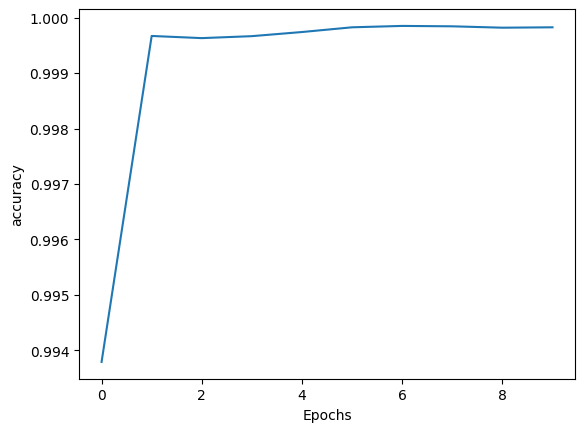

In [109]:
plot_graphs(history, 'accuracy')


In [110]:
seed_text = "agentic ai in future"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [111]:
seed_text = "agentic ai use cases are"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    print(f"token_list is: {token_list}")
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    print(f"token_list is after padding: {token_list}")
    predicted = np.argmax(model.predict(token_list), axis=-1)
    print(f"after argmax: {predicted}")
    output_word = ""
    #print(f"tokenizer word-index: {tokenizer.word_index.items()}")
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

token_list is: [3, 1]
token_list is after padding: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
after argmax: [51]
token_list is: [3, 1, 51]
token_list is after padding: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  3  1 51]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
after argmax: [52]
token_list is: [3, 1, 51, 52]
token_list is after padding: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   3  1 51 52]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
after argmax: [21]
token_list is: [3, 1, 51, 52, 21]
token_list is after padding: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3
   1 51 52 21]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
after argmax: [20]
token_list is: [3, 1, 51, 52, 21, 20]
token_list is after padding: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  1
  51 52 21 20]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
after argmax: [10]
